# Autoencoder in Keras

based on https://blog.keras.io/building-autoencoders-in-keras.html

In [2]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt

from keras.datasets import mnist

## load MNIST data

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print('X train shape', x_train.shape, '; X test shape', x_test.shape)

X train shape (60000, 784) ; X test shape (10000, 784)


## create model

In [5]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [5]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## train the model

In [14]:
hist = autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1010 - val_loss: 0.0991
Epoch 2/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.1005 - val_loss: 0.0987
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.1001 - val_loss: 0.0983
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.0997 - val_loss: 0.0980
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0994 - val_loss: 0.0977
Epoch 6/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0991 - val_loss: 0.0974
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0988 - val_loss: 0.0972
Epoch 8/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.0986 - val_loss: 0.0969
Epoch 9/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.0984 - val_loss: 0.0967
Epoch

## predict

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

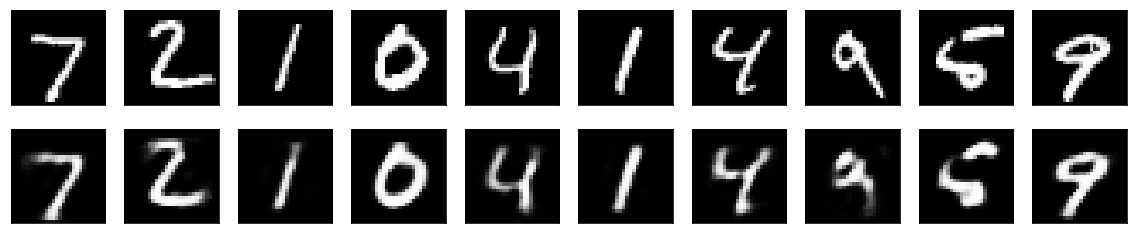

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()